In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Use raw string (r'...') to avoid issues with backslashes
file_path = r"/content/drive/MyDrive/Msc Projects/temparature.csv"

# Read the CSV file
df = pd.read_csv(file_path)

# Display the first few rows
df

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2013,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37,29.81,25.58,32.58,31.33,27.83
113,2014,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08,29.72,24.90,31.82,32.00,27.81
114,2015,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67,29.90,25.74,31.68,31.87,28.27
115,2016,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,31.63,28.33,34.57,32.28,30.03


In [ ]:
# Monthly DataFrame (JAN to DEC)
monthly_df = df[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
                 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]

#  Annual + Seasonal DataFrame (ANNUAL, JAN-FEB, ..., OCT-DEC)
seasonal_df = df[['YEAR', 'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP', 'OCT-DEC']]

# Optional: Save to new CSVs
monthly_df.to_csv('monthly_data.csv', index=False)
seasonal_df.to_csv('seasonal_summary.csv', index=False)

In [ ]:
monthly_df

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2013,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37
113,2014,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08
114,2015,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67
115,2016,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01


In [ ]:
df_long = monthly_df.melt(id_vars='YEAR',
                          value_vars=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
                                      'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'],
                          var_name='MONTH',
                          value_name='TEMP')

# Step 2: Create proper datetime from YEAR and MONTH
month_map = {'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
             'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12}

df_long['MONTH_NUM'] = df_long['MONTH'].map(month_map)
df_long['DATE'] = pd.to_datetime(dict(year=df_long['YEAR'], month=df_long['MONTH_NUM'], day=1))

# Step 3: Sort the data by date
df_long = df_long.sort_values('DATE')



In [ ]:
df_long

,YEAR,MONTH,TEMP,MONTH_NUM,DATE
0,1901,JAN,22.40,1,1901-01-01
117,1901,FEB,24.14,2,1901-02-01
234,1901,MAR,29.07,3,1901-03-01
351,1901,APR,31.91,4,1901-04-01
468,1901,MAY,33.41,5,1901-05-01
...,...,...,...,...,...
935,2017,AUG,31.72,8,2017-08-01
1052,2017,SEP,32.22,9,2017-09-01
1169,2017,OCT,32.29,10,2017-10-01
1286,2017,NOV,29.60,11,2017-11-01


# View of the monthly data

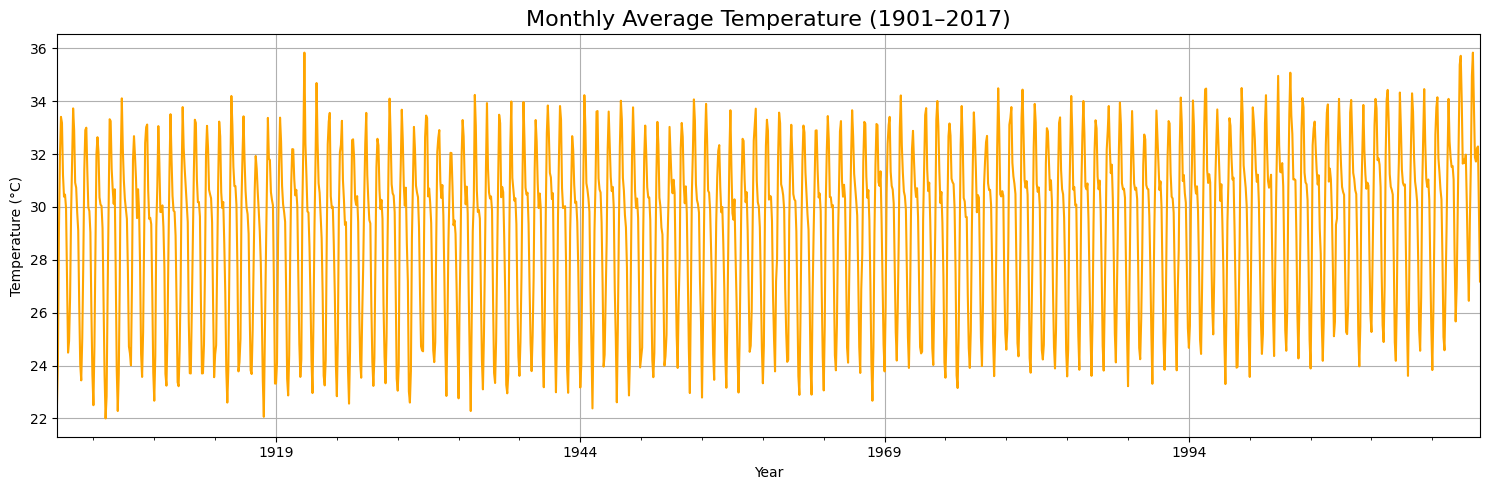

In [ ]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named `df` and DATE is datetime type

# Set DATE as index if not already
df = df_long.set_index('DATE')

# Plot the time series
plt.figure(figsize=(15, 5))
df['TEMP'].plot(color='orange')
plt.title('Monthly Average Temperature (1901–2017)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()


Here, the plot is like a x+sinx graph,which means its fluctuation is not increasing over the time .  

# We will compute the seasonal decomposition for the monthly data , with type = additive to get the seasonal , trend and residual components.


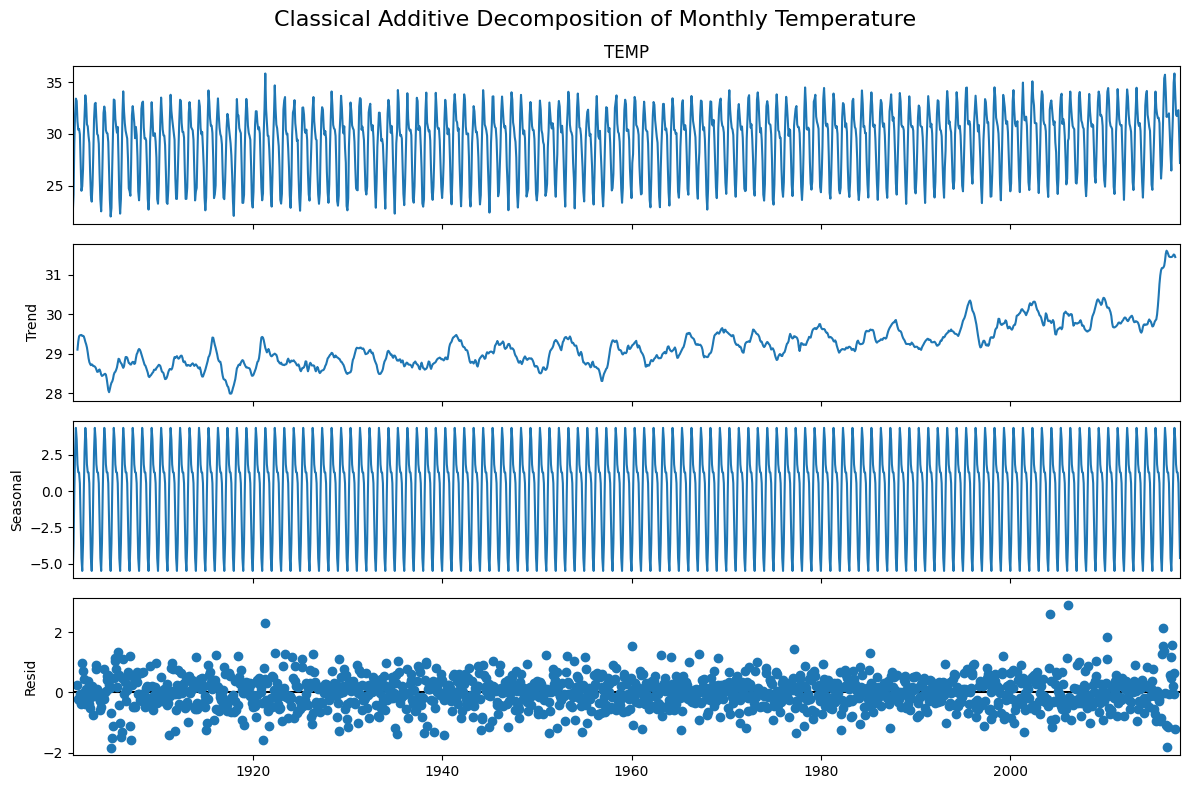

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure 'DATE' is datetime and set as index
df_long['DATE'] = pd.to_datetime(df_long['DATE'])
df_long = df_long.set_index('DATE').sort_index()

# Perform additive decomposition (monthly → period=12)
decomposition = seasonal_decompose(df_long['TEMP'], model='additive', period=12)

# Plot the decomposition
plt.rcParams.update({'figure.figsize': (12, 8)})
decomposition.plot()
plt.suptitle('Classical Additive Decomposition of Monthly Temperature', fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
decomposition = seasonal_decompose(df_long['TEMP'], model='additive', period=12)

In [ ]:
# Extract each component
observed = decomposition.observed
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


# ⌛ Making a data frame based on the decomposition

In [ ]:
decomp_df = pd.DataFrame({
    'Observed': observed,
    'Trend': trend,
    'Seasonal': seasonal,
    'Residual': residual
})

In [ ]:
decomp_df

,Observed,Trend,Seasonal,Residual
DATE,,,,
1901-01-01,22.40,NaN,-5.494525,NaN
1901-02-01,24.14,NaN,-3.583347,NaN
1901-03-01,29.07,NaN,-0.108764,NaN
1901-04-01,31.91,NaN,2.780033,NaN
1901-05-01,33.41,NaN,4.368636,NaN
...,...,...,...,...
2017-08-01,31.72,NaN,1.312540,NaN
2017-09-01,32.22,NaN,1.284289,NaN
2017-10-01,32.29,NaN,0.555306,NaN


In [ ]:
decomp_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1404 entries, 1901-01-01 to 2017-12-01
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Observed  1404 non-null   float64
 1   Trend     1392 non-null   float64
 2   Seasonal  1404 non-null   float64
 3   Residual  1392 non-null   float64
dtypes: float64(4)
memory usage: 54.8 KB


In [ ]:
decomp_df.describe()

,Observed,Trend,Seasonal,Residual
count,1404.000000,1392.000000,1.404000e+03,1392.000000
mean,29.198113,29.191017,3.858895e-17,0.000901
std,3.188367,0.532931,3.091805e+00,0.533827
min,22.000000,27.982083,-5.494525e+00,-1.848736
25%,26.670000,28.791042,-2.340314e+00,-0.321350
50%,30.090000,29.135417,9.197977e-01,0.006440
75%,31.460000,29.490208,2.080472e+00,0.300677
max,35.840000,31.612917,4.368636e+00,2.903764


# Observing the ACF plot of residuals to check wheather it is a White Noise or not .

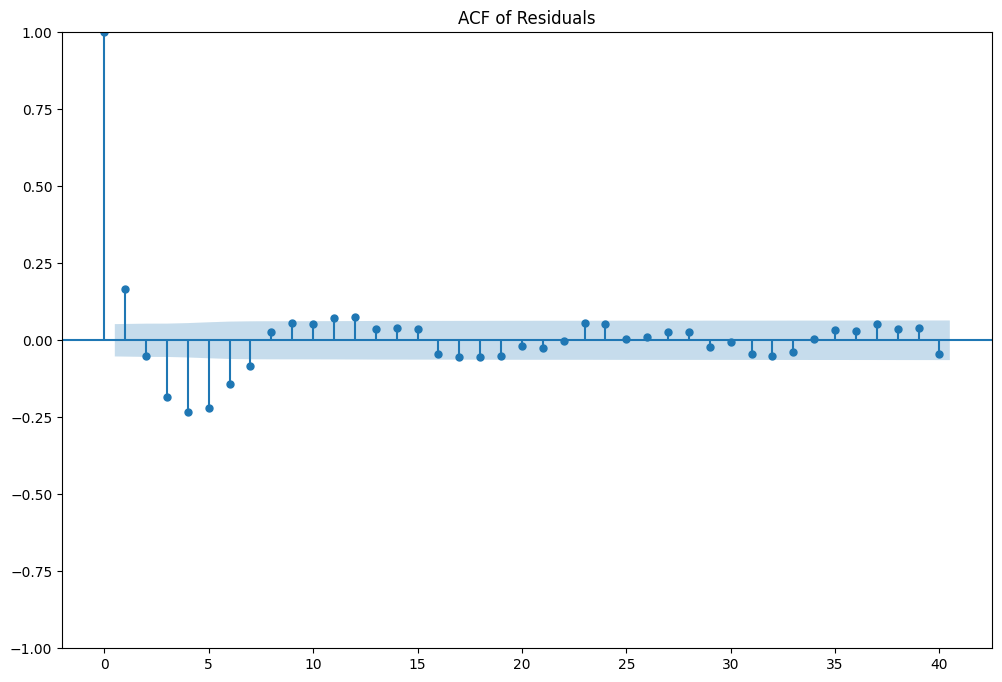

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

# If you've done decomposition:
resid = decomp_df['Residual'].dropna()

plot_acf(resid, lags=40)
plt.title('ACF of Residuals')
plt.show()


We observe some significant spike at at the lag 1,2,3,4,5,6,7 outside 95% confidence brand . The residual still contains auto-correlation , which violates the definition of white noise .

♒ Short note on Auto-Correlation :
    Lag1 autocorrelation means 'How today's temparature depends on yesterday . '

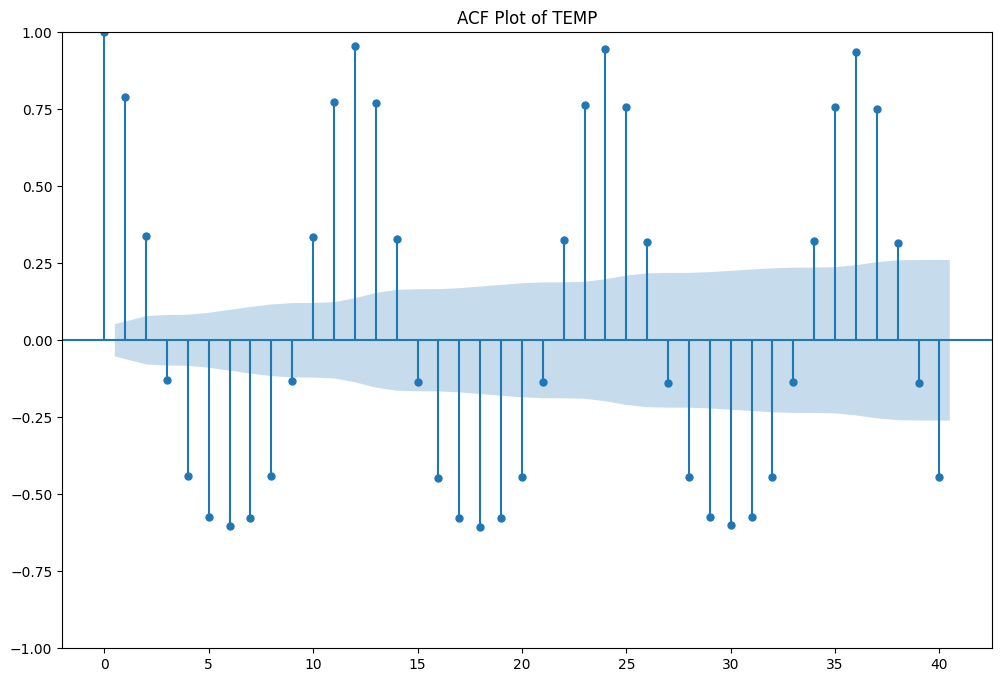

Ljung-Box Test Results:
         lb_stat  lb_pvalue
10   3239.187178        0.0
20   8441.905878        0.0
30  13005.032950        0.0


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Step 1: ACF plot
plot_acf(df_long['TEMP'], lags=40)
plt.title("ACF Plot of TEMP")
plt.show()

# Step 2: Ljung-Box test for white noise
# You can choose multiple lags, for example: 10, 20, 30
ljung_result = acorr_ljungbox(df_long['TEMP'], lags=[10, 20, 30], return_df=True)
print("Ljung-Box Test Results:")
print(ljung_result)


## 📊 White Noise Test Report for `df_long['TEMP']`

### 🔍 Objective:
To determine whether the time series `TEMP` is white noise — that is, a sequence of uncorrelated random variables with constant mean and variance.

---

### 🧪 Test Used:
**Ljung-Box Q Test**

This test evaluates whether autocorrelations at multiple lags are jointly equal to zero.

- **Null Hypothesis (H₀)**: The series is white noise (no significant autocorrelation).
- **Alternative Hypothesis (H₁)**: The series is not white noise (some autocorrelation present).

---

### 📊 Test Results:

| Lag | Ljung-Box Statistic | p-value |
|-----|---------------------|---------|
| 10  | 3239.19             | 0.000   |
| 20  | 8441.91             | 0.000   |
| 30  | 13005.03            | 0.000   |

---

### 📌 Interpretation:

- All p-values are **0.000**, which is significantly less than 0.05.
- Hence, we **reject the null hypothesis** at all tested lags.
- This means the time series exhibits **statistically significant autocorrelation** and is **not white noise**.

---

### ✅ Conclusion:

The temperature series `df_long['TEMP']` is **not white noise**. It contains strong autocorrelation, which is typical for real-world time series data such as temperature. Time series models that account for autocorrelation (e.g., ARIMA) are more appropriate for further analysis.


In [ ]:
df_long

,YEAR,MONTH,TEMP,MONTH_NUM
DATE,,,,
1901-01-01,1901,JAN,22.40,1
1901-02-01,1901,FEB,24.14,2
1901-03-01,1901,MAR,29.07,3
1901-04-01,1901,APR,31.91,4
1901-05-01,1901,MAY,33.41,5
...,...,...,...,...
2017-08-01,2017,AUG,31.72,8
2017-09-01,2017,SEP,32.22,9
2017-10-01,2017,OCT,32.29,10


# Augmented Dickey-Fuller (ADF) Test for Stationarity

## Hypotheses
- **H₀ (Null Hypothesis):** Data has a unit root (non-stationary)
- **H₁ (Alternative Hypothesis):** Data does not have a unit root (stationary)

## Decision Criteria
1. **p-value < 0.05** → Reject H₀ ⇒ Data is stationary
2. **ADF statistic < critical value** → Reject H₀ ⇒ Data is stationary

## Critical Values (MacKinnon)
| Significance Level | Critical Value |
|--------------------|----------------|
| 1%                 | ≈ -3.43        |
| 5%                 | ≈ -2.86        |
| 10%                | ≈ -2.57        |

## Test Results

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Run ADF test on the 'TEMP' column
adf_result = adfuller(df_long['TEMP'].dropna())

# Display the result
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Number of lags used:", adf_result[2])
print("Number of observations:", adf_result[3])
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")


ADF Statistic: -0.7511982763490788
p-value: 0.8330387727956927
Number of lags used: 23
Number of observations: 1380
Critical Values:
   1%: -3.435097467737946
   5%: -2.8636366587977804
   10%: -2.5678862576139467


### Test Results

- **ADF Statistic:** -0.7512  
- **p-value:** 0.8330  
- **Number of lags used:** 23  
- **Number of observations:** 1380

---

### Conclusion

- Since the **p-value (0.8330) > 0.05**, we **fail to reject** the null hypothesis.  
- The **ADF statistic (-0.7512)** is **greater** than all critical values.

➡️ **Result:** The data is **non-stationary**.

# Statistical Stationarity Analysis: KPSS Test Report

## 1. Test Overview
The **KPSS test** is a complementary stationarity test that differs from the ADF test in its null hypothesis:

- **Null Hypothesis (H₀):** The time series is stationary around a deterministic trend (level or trend stationarity)
- **Alternative Hypothesis (H₁):** The time series contains a unit root (non-stationary)

## 2. Key Characteristics
- Test statistic compares the residual variance from regression against long-run variance
- Three variants:
  - `c`: Constant only (level stationarity)
  - `ct`: Constant and trend (trend stationarity)
  - `ctt`: Constant, trend, and trend² (rarely used)
- Critical values derived from Kwiatkowski et al. (1992)

## 3. Interpretation Guide
| Test Statistic | Relation to Critical Value | Conclusion |
|----------------|---------------------------|------------|
| Low            | < Critical value          | Fail to reject H₀ (Stationary) |
| High           | ≥ Critical value          | Reject H₀ (Non-stationary) |

## 4. Critical Values (Sample)
| Significance Level | Constant (c) | Trend (ct) |
|--------------------|--------------|------------|
| 10%                | 0.347        | 0.119       |
| 5%                 | 0.463        | 0.146       |
| 1%                 | 0.739        | 0.216       |



In [ ]:
!pip install statsmodels

from statsmodels.tsa.stattools import kpss

# Run KPSS test
kpss_result = kpss(df_long['TEMP'], regression='ct', nlags="auto")

# Display results
print("KPSS Statistic:", kpss_result[0])
print("p-value:", kpss_result[1])
print("Number of lags:", kpss_result[2])
print("Critical Values:")
for key, value in kpss_result[3].items():
    print(f"   {key}: {value}")


KPSS Statistic: 0.33415853909871157
p-value: 0.01
Number of lags: 59
Critical Values:
   10%: 0.119
   5%: 0.146
   2.5%: 0.176
   1%: 0.216


/tmp/ipython-input-1081868822.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(df_long['TEMP'], regression='ct', nlags="auto")


### Test Results

- **KPSS Statistic:** 0.3342  
- **p-value:** 0.01 *(The actual p-value is smaller than 0.01; test statistic is outside lookup table)*  
- **Number of lags used:** 59

---

### Conclusion

- The **KPSS statistic (0.3342)** is **greater** than all the critical values at the 1%, 2.5%, 5%, and 10% levels.
- The **p-value (0.01)** is below the 0.05 threshold, and a warning suggests the true p-value is even **lower**.

➡️ **Result:** Reject H₀ ⇒ The data is **non-stationary**.


# ⏰ Detect if the Distribution Changes Over Time in a Univariate Time Series


# ⚓ Pettitt Test (Non-parametric change-point test)

If p-value < 0.05, there's significant evidence of a change point.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rankdata, norm

def pettitt_test(x):
    n = len(x)
    ranks = rankdata(x)
    U = np.zeros(n)

    for t in range(n):
        U[t] = 2 * np.sum(ranks[:t]) - t * (n + 1)

    K = np.argmax(np.abs(U))
    U_max = np.abs(U[K])

    # Calculate p-value approximation
    p_value = 2 * np.exp((-6 * U_max**2) / (n**3 + n**2))

    return {"change_point": K, "U_max": U_max, "p_value": p_value}

# Example usage:
result = pettitt_test(df_long['TEMP'].values if hasattr(df_long['TEMP'], "values") else np.array(df_long['TEMP']))
print("Pettitt Test Result:")
print("Change point at index:", result["change_point"])
print("Test statistic (U_max):", result["U_max"])
print("p-value:", result["p_value"])


Pettitt Test Result:
Change point at index: 807
Test statistic (U_max): 78384.0
p-value: 3.3138856702575243e-06


## 🔀 Pettitt Test Report for Change Point Detection in Time Series

### 📌 Objective
To identify whether there is a **statistically significant change point** in the time series using the **Pettitt test**, a non-parametric method that detects a shift in the median (or general distribution).

---

### 🧪 Test Details

- **Test Used:** Pettitt’s test for a single change point  
- **Null Hypothesis (H₀):** There is **no change point**; the time series is identically distributed over time.  
- **Alternative Hypothesis (H₁):** There is **at least one change point**, indicating a shift in the distribution (e.g., mean/median).

---

### 📊 Test Output

- **Change point index:** **807**  
- **Test statistic (U_max):** **78384.0**  
- **p-value:** **3.31 × 10⁻⁶**

---

### ✅ Interpretation

- The **p-value is far below 0.05**, so we **reject the null hypothesis**.
- This provides **strong evidence of a significant change point** at index **807** in the time series.
- The change likely corresponds to a **structural shift** — such as a change in level, trend, or regime.

➡️ **Conclusion:** The time series has a significant distributional change around **time step 807**.

---


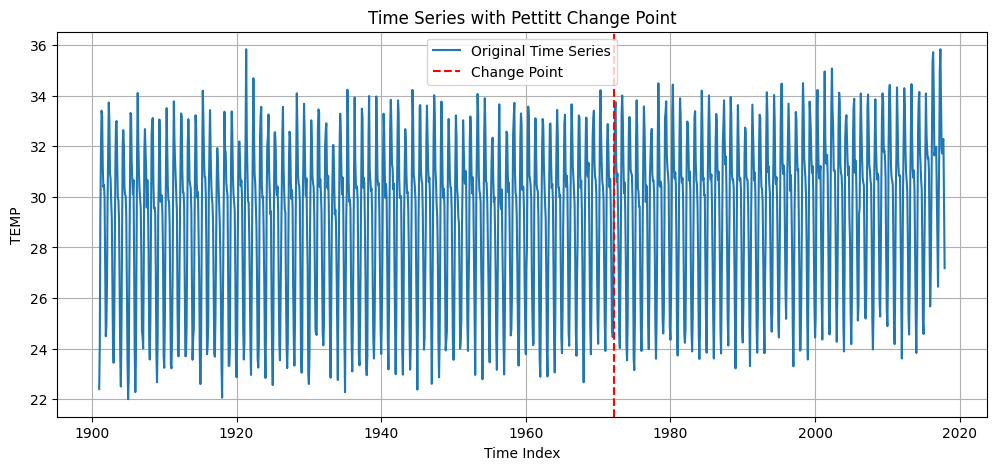

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df_long['TEMP'], label='Original Time Series')
plt.axvline(result["change_point"], color='red', linestyle='--', label='Change Point')
plt.title('Time Series with Pettitt Change Point')
plt.xlabel('Time Index')
plt.ylabel('TEMP')
plt.legend()
plt.grid(True)
plt.show()


# Kolmogorov Smirnov Test

In [ ]:
from scipy.stats import ks_2samp

# Split the series in two halves
mid = len(df_long) // 2
first_half = df_long['TEMP'].iloc[:mid]
second_half = df_long['TEMP'].iloc[mid:]

# Run KS test
ks_stat, ks_p = ks_2samp(first_half, second_half)

print("KS Statistic:", ks_stat)
print("p-value:", ks_p)


KS Statistic: 0.1396011396011396
p-value: 2.2095635915916196e-06


## 📊 Change Point and Distribution Shift Report

This report summarizes the findings from two statistical tests used to detect structural and distributional changes in the univariate time series data (`TEMP`):

- **Pettitt Test** – to identify a single, significant change point
- **Kolmogorov–Smirnov (KS) Test** – to compare the distributions before and after the change

---

### 🔹 1. Pettitt Test

#### 🧪 Test Description:
- **Purpose**: Detects a **single change point** in a time series where the distribution shifts.
- **Null Hypothesis (H₀)**: The data comes from a **single, continuous distribution** (no change point).
- **Alternative Hypothesis (H₁)**: There exists a **change point** where the distribution changes.

#### 📈 Test Result:
- **Change point detected at index**: 807  
- **Test statistic (U_max)**: 78,384.0  
- **p-value**: 3.31 × 10⁻⁶

#### ✅ Interpretation:
- The **very low p-value** provides strong evidence **against** the null hypothesis.
- This implies a **significant change in the distribution** occurred at **time index 807**, consistent with a **regime shift** in the time series.

---

### 🔹 2. Kolmogorov–Smirnov (KS) Two-Sample Test

#### 🧪 Test Description:
- **Purpose**: Compares the **distribution of two independent samples**.
- **Application**: The time series was split into **first and second halves** and tested for distributional equality.
- **Null Hypothesis (H₀)**: Both halves of the series come from the **same continuous distribution**.
- **Alternative Hypothesis (H₁)**: The distributions differ.

#### 📈 Test Result:
- **KS Statistic**: 0.1396  
- **p-value**: 2.21 × 10⁻⁶

#### ✅ Interpretation:
- The extremely low p-value indicates the **two halves of the series are drawn from different distributions**.
- This supports the Pettitt test result and further confirms a **structural change** in the data.

---

### 📌 Combined Conclusion:

Both the **Pettitt test** and the **Kolmogorov–Smirnov test** provide **strong, statistically significant evidence** that the time series `TEMP` experienced a **change in distribution** — particularly around **index 807**.

This finding supports the earlier diagnosis of **non-stationarity** (from ADF and KPSS tests) and suggests that:

- The series is **not identically distributed** over time.
- A **regime shift** has likely occurred at or around index 807.

---



# ⚖ Making the data stationary using first order differencing

In [ ]:
# first order differencing
df_long["TEMP"].diff()

,TEMP
DATE,
1901-01-01,NaN
1901-02-01,1.74
1901-03-01,4.93
1901-04-01,2.84
1901-05-01,1.50
...,...
2017-08-01,-0.16
2017-09-01,0.50
2017-10-01,0.07


# ⛹ Second Order Differencing

In [ ]:
# second order differencing
df_long["TEMP"].diff().diff()

,TEMP
DATE,
1901-01-01,NaN
1901-02-01,NaN
1901-03-01,3.19
1901-04-01,-2.09
1901-05-01,-1.34
...,...
2017-08-01,1.78
2017-09-01,0.66
2017-10-01,-0.43


# Log Transformation

In [ ]:
import numpy as np
from scipy import stats
temp_log = np.log(df_long['TEMP'])

# Square-Root transformation

In [ ]:
temp_sqrt = np.sqrt(df_long['TEMP'])

In [ ]:
temp_sqrt

,TEMP
DATE,
1901-01-01,4.732864
1901-02-01,4.913247
1901-03-01,5.391660
1901-04-01,5.648894
1901-05-01,5.780138
...,...
2017-08-01,5.632051
2017-09-01,5.676266
2017-10-01,5.682429


# Box-Cox Transformation with inbuilt lambda in Python

In [ ]:
temp_boxcox, lambda_value = stats.boxcox(df_long['TEMP'])

In [ ]:
temp_boxcox

array([ 3577.9892665 ,  4472.77698622,  7787.15374586, ...,
       10653.63458519,  8218.44990486,  6371.93037091])

In [ ]:
lambda_value

np.float64(2.983450854422799)

In [ ]:
temp_log

,TEMP
DATE,
1901-01-01,3.109061
1901-02-01,3.183870
1901-03-01,3.369707
1901-04-01,3.462919
1901-05-01,3.508855
...,...
2017-08-01,3.456947
2017-09-01,3.472587
2017-10-01,3.474758


# Checking stationarity with log transformation

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Run ADF test on the 'TEMP' column
adf_log_transform = adfuller(temp_log.dropna())

# Display the result
print("ADF Statistic:", adf_log_transform[0])
print("p-value:", adf_log_transform[1])
print("Number of lags used:", adf_log_transform[2])
print("Number of observations:", adf_log_transform[3])
print("Critical Values:")
for key, value in adf_log_transform[4].items():
    print(f"   {key}: {value}")

ADF Statistic: -1.005370898748177
p-value: 0.751300352060184
Number of lags used: 24
Number of observations: 1379
Critical Values:
   1%: -3.4351009168670035
   5%: -2.863638180853028
   10%: -2.5678870681532424


### 📌 Interpretation:

- The **ADF Statistic** is `-1.0054`, which is **greater than all the critical values** at the 1%, 5%, and 10% levels.
- The **p-value** is `0.7513`, which is **much greater than 0.05**.

Hence, we **fail to reject the null hypothesis**.

---

### 🚫 Conclusion:

Log transformation  is **not stationary**. This suggests the presence of **trend, seasonality, or a unit root**, and the data likely needs transformation (such as differencing) before applying forecasting models like ARIMA.


In [ ]:
adf_sqrt_transform = adfuller(temp_sqrt.dropna())

# Display the result
print("ADF Statistic sqrt:", adf_sqrt_transform[0])
print("p-value:", adf_sqrt_transform[1])
print("Number of lags used:", adf_sqrt_transform[2])
print("Number of observations:", adf_sqrt_transform[3])
print("Critical Values:")
for key, value in adf_sqrt_transform[4].items():
    print(f"   {key}: {value}")

ADF Statistic sqrt: -0.9574248895220344
p-value: 0.768474296326999
Number of lags used: 24
Number of observations: 1379
Critical Values:
   1%: -3.4351009168670035
   5%: -2.863638180853028
   10%: -2.5678870681532424


### 📉 ADF Test After Square Root Transformation

#### 🔍 Interpretation:

- **ADF Statistic** = `-0.9574`
- **p-value** = `0.7685`
- Critical Values:
  - 1%: `-3.4351`
  - 5%: `-2.8636`
  - 10%: `-2.5679`

The ADF statistic is **greater than all the critical values**, and the **p-value (0.7685)** is significantly **greater than 0.05**.

---

#### 🚫 Conclusion:

After applying the **square root transformation**, the time series still appears to be **non-stationary**.  
We **fail to reject the null hypothesis** of the presence of a unit root.

This means that the square root transformation **did not remove the non-stationarity** in the `TEMP` series.

In [ ]:
adf_boxcox_transform = adfuller(temp_boxcox)

# Display the result
print("ADF Statistic boxcox:", adf_boxcox_transform[0])
print("p-value:", adf_boxcox_transform[1])
print("Number of lags used:", adf_boxcox_transform[2])
print("Number of observations:", adf_boxcox_transform[3])
print("Critical Values:")
for key, value in adf_sqrt_transform[4].items():
    print(f"   {key}: {value}")

ADF Statistic boxcox: -0.6844485329649155
p-value: 0.850736701237812
Number of lags used: 23
Number of observations: 1380
Critical Values:
   1%: -3.4351009168670035
   5%: -2.863638180853028
   10%: -2.5678870681532424


### 📉 ADF Test After Box-Cox Transformation (on Temperature Series)

#### 🔍 Interpretation:

- **ADF Statistic** = `-0.6844`
- **p-value** = `0.8507`
- **Number of Lags Used** = `23`
- **Number of Observations** = `1380`

**Critical Values**:
- 1%: `-3.4351`
- 5%: `-2.8636`
- 10%: `-2.5679`

The ADF statistic is **higher than all critical values**, and the **p-value (0.8507)** is well above the 0.05 threshold.

---

#### 🚫 Conclusion:

The Box-Cox transformation **did not make the temperature series stationary**.  
We again **fail to reject the null hypothesis** of the ADF test, indicating the **presence of a unit root**.

Therefore, even after Box-Cox transformation, the series remains **non-stationary**.

In [ ]:
temp_1st_diff = df_long["TEMP"].diff()

In [ ]:
temp_1st_diff

,TEMP
DATE,
1901-01-01,NaN
1901-02-01,1.74
1901-03-01,4.93
1901-04-01,2.84
1901-05-01,1.50
...,...
2017-08-01,-0.16
2017-09-01,0.50
2017-10-01,0.07


In [ ]:
adf_1st_diff = adfuller(temp_1st_diff.dropna())

# Display the result
print("ADF Statistic 1st difference:", adf_1st_diff[0])
print("p-value:", adf_1st_diff[1])
print("Number of lags used:", adf_1st_diff[2])
print("Number of observations:", adf_1st_diff[3])
print("Critical Values:")
for key, value in adf_1st_diff[4].items():
    print(f"   {key}: {value}")

ADF Statistic 1st difference: -11.552728538410193
p-value: 3.416432138110408e-21
Number of lags used: 24
Number of observations: 1378
Critical Values:
   1%: -3.4351043710114393
   5%: -2.863639705119746
   10%: -2.5678878798704923


### 📉 ADF Test After First-Order Differencing (on Temperature Series)

#### 🔍 Interpretation:

- **ADF Statistic** = `-11.5527`
- **p-value** = `3.42 × 10⁻²¹`
- **Number of Lags Used** = `24`
- **Number of Observations** = `1378`

**Critical Values**:
- 1%: `-3.4351`
- 5%: `-2.8636`
- 10%: `-2.5679`

The ADF statistic is **much lower** (more negative) than all critical values, and the **p-value is extremely small (≈ 0)**.

---

#### ✅ Conclusion:

After applying **first-order differencing**, the time series becomes **stationary**.

We **reject the null hypothesis** of the ADF test, confirming the **absence of a unit root**. This transformation has successfully addressed the non-stationarity in the `TEMP` series.

The differenced series is now suitable for time series modeling techniques such as **ARIMA**, **SARIMA**, or other forecasting models that assume stationarity.


In [ ]:
df_long

,YEAR,MONTH,TEMP,MONTH_NUM
DATE,,,,
1901-01-01,1901,JAN,22.40,1
1901-02-01,1901,FEB,24.14,2
1901-03-01,1901,MAR,29.07,3
1901-04-01,1901,APR,31.91,4
1901-05-01,1901,MAY,33.41,5
...,...,...,...,...
2017-08-01,2017,AUG,31.72,8
2017-09-01,2017,SEP,32.22,9
2017-10-01,2017,OCT,32.29,10


# Non Parametric De-Trending

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_long['TEMP'], model='additive', period=12)

In [ ]:
temp_detrend = df_long['TEMP'] - decomposition.trend

In [ ]:
temp_detrend

,0
DATE,
1901-01-01,NaN
1901-02-01,NaN
1901-03-01,NaN
1901-04-01,NaN
1901-05-01,NaN
...,...
2017-08-01,NaN
2017-09-01,NaN
2017-10-01,NaN


In [ ]:
adf_detrend= adfuller(temp_detrend.dropna())

# Display the result
print("ADF Statistic for detrend:", adf_detrend[0])
print("p-value:", adf_detrend[1])
print("Number of lags used:", adf_detrend[2])
print("Number of observations:", adf_detrend[3])
print("Critical Values:")
for key, value in adf_detrend[4].items():
    print(f"   {key}: {value}")

ADF Statistic for detrend: -13.454831113821875
p-value: 3.6244428666339125e-25
Number of lags used: 24
Number of observations: 1367
Critical Values:
   1%: -3.4351427007691138
   5%: -2.863656619400241
   10%: -2.56789688724555


#  Linear De-Trending

In [ ]:
import numpy as np

# Assuming temp is your time series (e.g., df_long['TEMP'])
temp = df_long['TEMP'].values
time = np.arange(len(temp))  # time index

# Fit a linear trend line (degree 1 polynomial)
coeffs = np.polyfit(time, temp, deg=1)  # Returns slope and intercept

# Evaluate the trend line at each time point
trend_line = np.polyval(coeffs, time)

# Subtract trend to get detrended data
detrended_temp = temp - trend_line


In [ ]:
detrended_temp

array([-6.04735016, -4.30842039,  0.62050939, ...,  2.34326554,
       -0.34780468, -2.76887491])

In [ ]:
adf_detrend_linear= adfuller(detrended_temp)

# Display the result
print("ADF Statistic for linear detrend:", adf_detrend_linear[0])
print("p-value:", adf_detrend_linear[1])
print("Number of lags used:", adf_detrend_linear[2])
print("Number of observations:", adf_detrend_linear[3])
print("Critical Values:")
for key, value in adf_detrend_linear[4].items():
    print(f"   {key}: {value}")

ADF Statistic for linear detrend: -4.215286419457591
p-value: 0.000620722746205709
Number of lags used: 24
Number of observations: 1379
Critical Values:
   1%: -3.4351009168670035
   5%: -2.863638180853028
   10%: -2.5678870681532424


### 📌 Interpretation:

- The **ADF Statistic** of `-4.2153` is **lower (more negative)** than all critical values at the 1%, 5%, and 10% levels.
- The **p-value** of `0.00062` is well **below 0.05**, indicating strong evidence against the null hypothesis.

---

### ✅ Conclusion:

After **removing the linear trend**, the `TEMP` series becomes **stationary**.

We **reject the null hypothesis** of the ADF test, confirming that the linear trend was the main cause of non-stationarity.  
This makes the detrended series suitable for modeling techniques that require stationarity, such as **ARMA**, **ETS**, or **frequency domain analysis**.

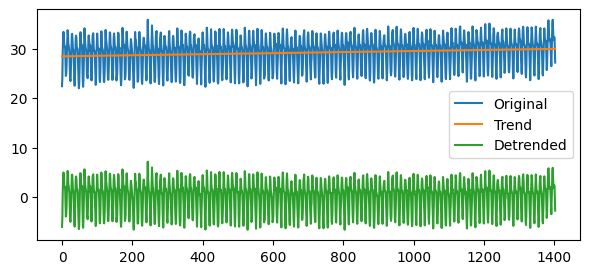

In [ ]:
plt.figure(figsize=(7, 3))
plt.plot(time, temp, label='Original')
plt.plot(time, trend_line, label='Trend')
plt.plot(time, detrended_temp, label='Detrended')
plt.legend()

# 12 Month Centred Moving Average

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Use your original time series
temp = df_long['TEMP']

# Step 2: Calculate 12-month centered moving average
moving_avg = temp.rolling(window=12, center=True).mean()

# Step 3: Subtract to get detrended series
detrended_temp_ma  = temp - moving_avg

In [ ]:
detrended_temp_ma.dropna()

,TEMP
DATE,
1901-07-01,2.214167
1901-08-01,1.183333
1901-09-01,1.060000
1901-10-01,0.501667
1901-11-01,-2.147500
...,...
2017-03-01,0.143333
2017-04-01,3.446667
2017-05-01,4.310833


In [ ]:
adf_detrend_linear_ma= adfuller(detrended_temp_ma.dropna())

# Display the result
print("ADF Statistic for linear detrend MA:", adf_detrend_linear_ma[0])
print("p-value:", adf_detrend_linear_ma[1])
print("Number of lags used:", adf_detrend_linear_ma[2])
print("Number of observations:", adf_detrend_linear_ma[3])
print("Critical Values:")
for key, value in adf_detrend_linear_ma[4].items():
    print(f"   {key}: {value}")

ADF Statistic for linear detrend MA: -12.783943378269093
p-value: 7.314683457255004e-24
Number of lags used: 24
Number of observations: 1368
Critical Values:
   1%: -3.435139190725917
   5%: -2.8636550704859007
   10%: -2.5678960623995417


### 📌 Interpretation:

- The **ADF Statistic** is significantly **lower than all critical values**, indicating strong evidence against the null hypothesis.
- The **p-value** is extremely small (much less than 0.05), suggesting the presence of **stationarity**.

---

### ✅ Conclusion:

After applying **12-month centered moving average detrending**, the temperature time series becomes **stationary**.

We **reject the null hypothesis** of the ADF test, confirming that the trend component was successfully removed and the remaining series exhibits no unit root.


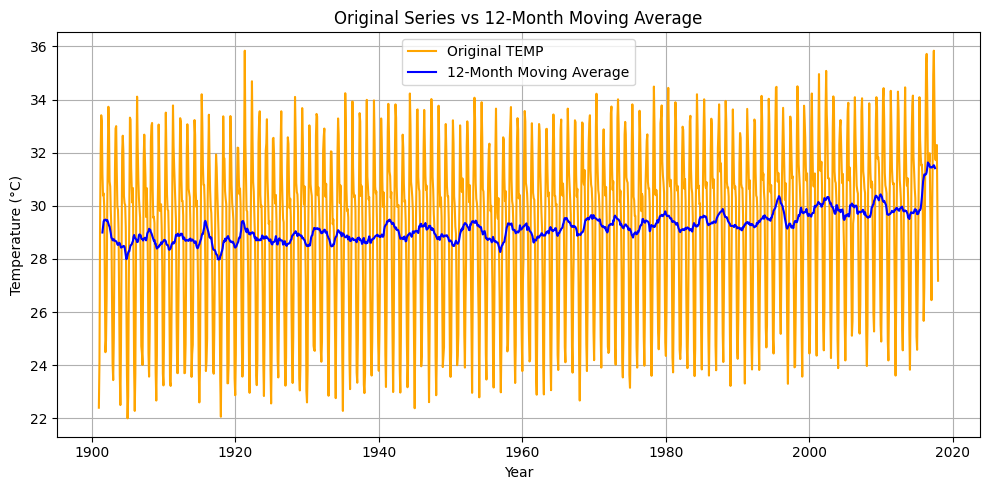

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(temp.index, temp, label='Original TEMP', color='orange')
plt.plot(temp.index, moving_avg, label='12-Month Moving Average', color='blue')
plt.title('Original Series vs 12-Month Moving Average')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
temp_1st_diff

,TEMP
DATE,
1901-01-01,NaN
1901-02-01,1.74
1901-03-01,4.93
1901-04-01,2.84
1901-05-01,1.50
...,...
2017-08-01,-0.16
2017-09-01,0.50
2017-10-01,0.07


# Linear detrending , 1st order differencing and 12 month centred moving average all are giving stationary data . But we will apply 1st order differencing to fit ARIMA model as it just remove trend and keep seasonality and short variances .  

# Checking Rolling Standard Deviation for 1st order differencing

### why it is necessary ?
ARIMA and SARIMA and other similar model assume that residuals have
constant variance i.e. homoscedastic .If variance isn't constant then you'll get poor model fit and Violate model assumptions


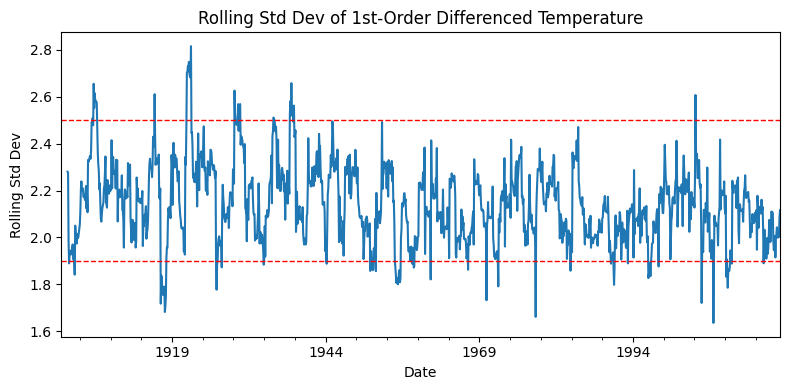

In [ ]:
import matplotlib.pyplot as plt

# Compute first-order difference
df_long['temp_1st_diff'] = df_long['TEMP'].diff()

# Create smaller figure
plt.figure(figsize=(8, 4))  # You can adjust width and height as needed

# Plot rolling standard deviation
df_long['temp_1st_diff'].rolling(window=12).std().plot()

# Title and display
plt.title("Rolling Std Dev of 1st-Order Differenced Temperature")
plt.xlabel("Date")
plt.ylabel("Rolling Std Dev")
plt.tight_layout()
plt.axhline(y=2.5, color='red', linestyle='--', linewidth=1)
plt.axhline(y=1.9, color='red', linestyle='--', linewidth=1)
plt.show()


## 📊 Rolling Standard Deviation of 1st-Order Differenced Temperature

### ❄ Observation from the Plot
- The rolling standard deviation mostly fluctuates between **1.9 and 2.5**, with some **spikes** and **short-term noise**, which is typical for real-world time series.

---

### ♻ Interpretation
1. ✅ The **variance is almost stable** over time — no clear upward or downward trend.
2. ✅ The **first-order differenced series is stationary** in both **mean** (confirmed by ADF) and **variance** (confirmed visually here).
3. ✅ You can **safely proceed** with models like **ARIMA**, **SARIMA**, or related time series techniques **on `temp_1st_diff`** without applying additional **variance-stabilizing transformations** such as **log** or **Box-Cox**.

---

### 🧠 Final Note
This diagnostic step validates that your transformed data (`temp_1st_diff`) satisfies key assumptions required for classical time series modeling, ensuring more **accurate forecasting** and **statistical reliability**.


# ☪ ACF and PACF plot on 1st order differencing data .

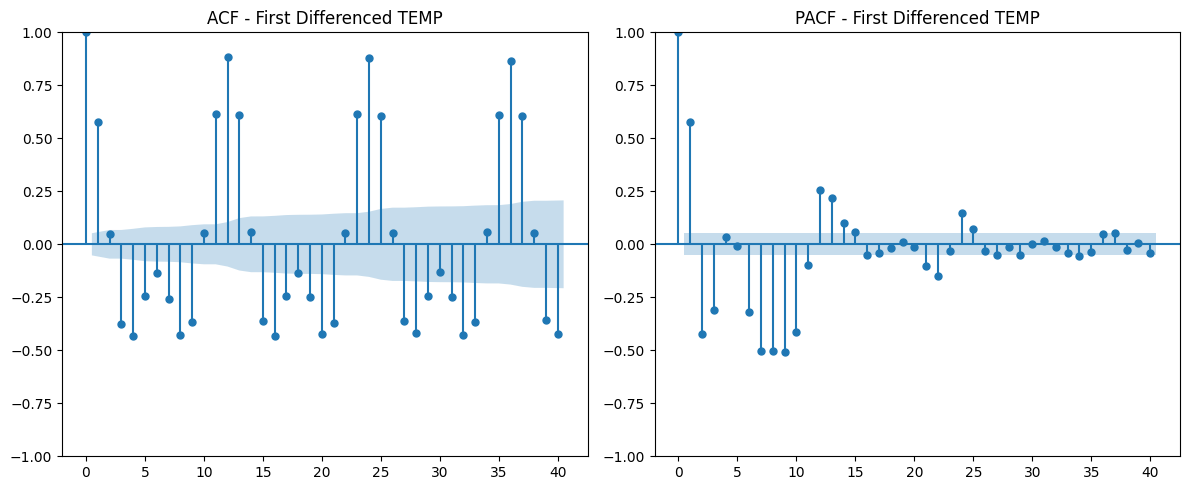

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'temp_1st_diff' is your stationary series
plt.figure(figsize=(12, 5))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(temp_1st_diff.dropna(), lags=40, ax=plt.gca(), title="ACF - First Differenced TEMP")

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(temp_1st_diff.dropna(), lags=40, ax=plt.gca(), title="PACF - First Differenced TEMP", method='ywm')

plt.tight_layout()
plt.show()


If you see the ACF and PACF plot both are decaying sinusoidally with some seasonal pattern in ACF plot . So it should be SARIMA model .PACF cutoff at 3 so p = 3 , d = 1 , since we did first differencing , ACF cutoff at lag1 so q=1, seasonal PACF shows spike at lag 12 so P=1 , seasonal pattern still exist after 1st differencing , so D = 1,ACF spike at lag 12 , so Q = 1 , and S=12, Monthly seasonality inferred from seasonal ACF spikes

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


In [ ]:
temp_1st_diff.index = pd.to_datetime(temp_1st_diff.index)

In [ ]:
df_long

,YEAR,MONTH,TEMP,MONTH_NUM,temp_1st_diff
DATE,,,,,
1901-01-01,1901,JAN,22.40,1,NaN
1901-02-01,1901,FEB,24.14,2,1.74
1901-03-01,1901,MAR,29.07,3,4.93
1901-04-01,1901,APR,31.91,4,2.84
1901-05-01,1901,MAY,33.41,5,1.50
...,...,...,...,...,...
2017-08-01,2017,AUG,31.72,8,-0.16
2017-09-01,2017,SEP,32.22,9,0.50
2017-10-01,2017,OCT,32.29,10,0.07


In [ ]:
temp_series

,TEMP
DATE,
1901-01-01,22.40
1901-02-01,24.14
1901-03-01,29.07
1901-04-01,31.91
1901-05-01,33.41
...,...
2017-08-01,31.72
2017-09-01,32.22
2017-10-01,32.29


In [ ]:
# Extract TEMP column as time series
temp_series = df_long['TEMP']
temp_series.index = pd.to_datetime(df_long.index)

# Train-test split: last 100 for testing
train = temp_series[:-100]
test = temp_series[-100:]

# Fit SARIMA(3,1,1)(1,1,1,12)
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train,
                order=(3, 1, 1),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()


# Evaluate forecast
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'RMSE: {rmse:.2f}')


  ########################



# Forecast for test period
pred_test = results.get_forecast(steps=len(test))
pred_test_mean = pred_test.predicted_mean
pred_test_ci = pred_test.conf_int()

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test, pred_test_mean))
print(f"Test RMSE: {rmse:.4f}")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RMSE: 0.96
Test RMSE: 0.9590


In [ ]:
print(results.summary())


                                     SARIMAX Results                                      
Dep. Variable:                               TEMP   No. Observations:                 1304
Model:             SARIMAX(3, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1099.515
Date:                            Sat, 16 Aug 2025   AIC                           2213.030
Time:                                    10:12:00   BIC                           2249.090
Sample:                                01-01-1901   HQIC                          2226.573
                                     - 08-01-2009                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2886      0.025     11.518      0.000       0.240       0.338
ar.L2          0.0548      0.028   

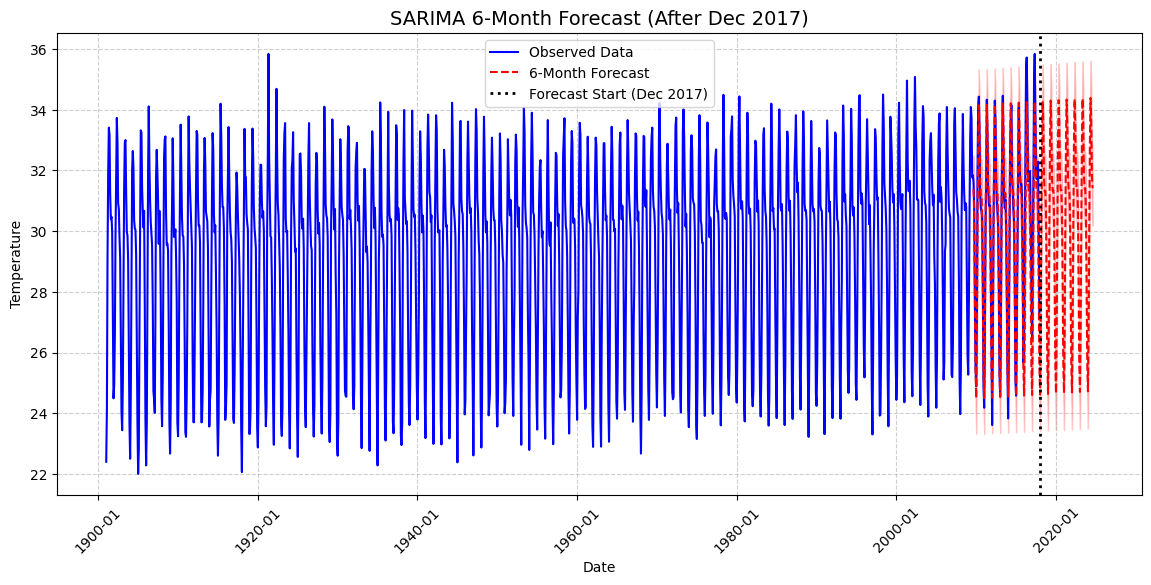

In [ ]:
import matplotlib.dates as mdates

# Forecast next 6 months (approx 180 days)
n_forecast = 180
forecast_results = results.get_forecast(steps=n_forecast)

forecast_mean = forecast_results.predicted_mean
forecast_ci = forecast_results.conf_int()

# Plot forecast after Dec 2017
plt.figure(figsize=(14, 6))
plt.plot(temp_series.index, temp_series, label='Observed Data', color='blue')
plt.plot(forecast_mean.index, forecast_mean, label='6-Month Forecast', color='red', linestyle='--')

# Confidence interval shading
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='red', alpha=0.2)

# Mark December 2017
cutoff_date = "2017-12-31"
plt.axvline(pd.to_datetime(cutoff_date), color='black', linestyle=':', linewidth=2, label="Forecast Start (Dec 2017)")

# Format x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.title("SARIMA 6-Month Forecast (After Dec 2017)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [ ]:
residuals = results.resid
residuals

,0
DATE,
1901-01-01,22.400000
1901-02-01,-0.414979
1901-03-01,3.962841
1901-04-01,1.644387
1901-05-01,0.678376
...,...
2009-04-01,0.084679
2009-05-01,-0.217709
2009-06-01,0.429083


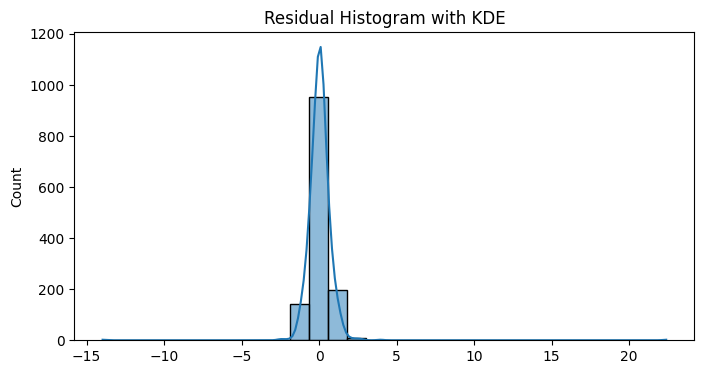

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residual Histogram with KDE")
plt.show()


In [ ]:
params = results.params
print(params)


ar.L1       0.288613
ar.L2       0.054754
ar.L3       0.027650
ma.L1      -1.007415
ar.S.L12    0.000067
ma.S.L12   -1.045695
sigma2      0.289247
dtype: float64


In [ ]:
# Seasonal differencing at lag 12
temp_seasonal_diff = df_long['TEMP'].diff(12)

# Drop NA values resulting from differencing
temp_seasonal_diff = temp_seasonal_diff.dropna()

# Display the result
print(temp_seasonal_diff.head())


DATE
1902-01-01    2.53
1902-02-01    2.44
1902-03-01    0.70
1902-04-01   -0.13
1902-05-01    0.32
Name: TEMP, dtype: float64


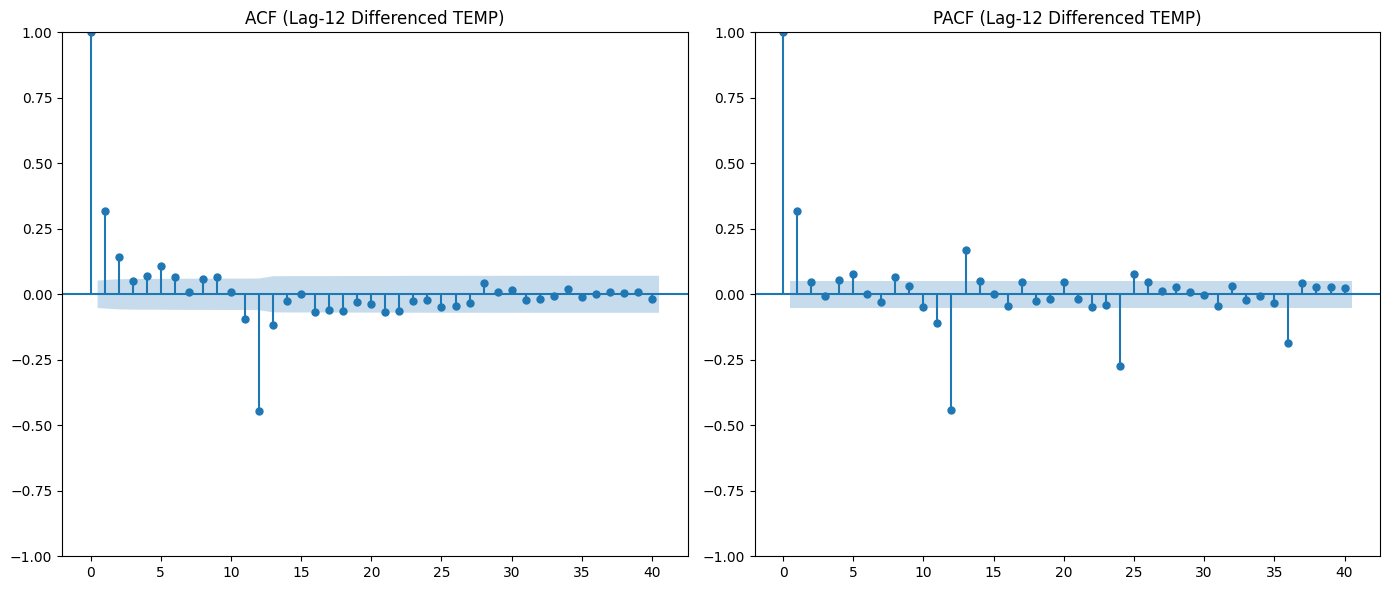

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 1. Seasonal differencing at lag 12
temp_seasonal_diff = df_long['TEMP'].diff(12).dropna()

# 2. Plot ACF and PACF
plt.figure(figsize=(14, 6))

# ACF
plt.subplot(1, 2, 1)
plot_acf(temp_seasonal_diff, lags=40, ax=plt.gca(), title='ACF (Lag-12 Differenced TEMP)')

# PACF
plt.subplot(1, 2, 2)
plot_pacf(temp_seasonal_diff, lags=40, ax=plt.gca(), method='ywm', title='PACF (Lag-12 Differenced TEMP)')

plt.tight_layout()
plt.show()
